In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [2]:
ticker = yf.Ticker('SPY')
spy_data = ticker.history(start="1995-01-01", end="2025-01-01")
series = spy_data['Close']

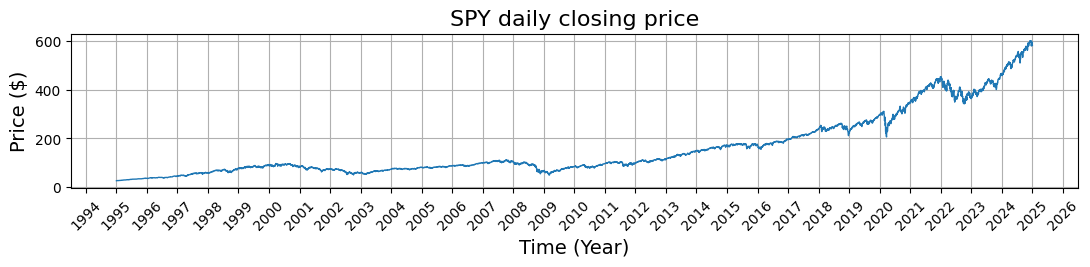

In [3]:
plt.figure(figsize = (13, 2))
plt.plot(series, linewidth = 1)
plt.title('SPY daily closing price', fontsize = 16), plt.xlabel('Time (Year)', fontsize = 14), plt.ylabel('Price ($)', fontsize = 14)
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show year only
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

## Log-Returns

In [4]:
r_t = np.log(series).diff(1)*100 # returns
r_t_clean = r_t.dropna() # Remove the first observation

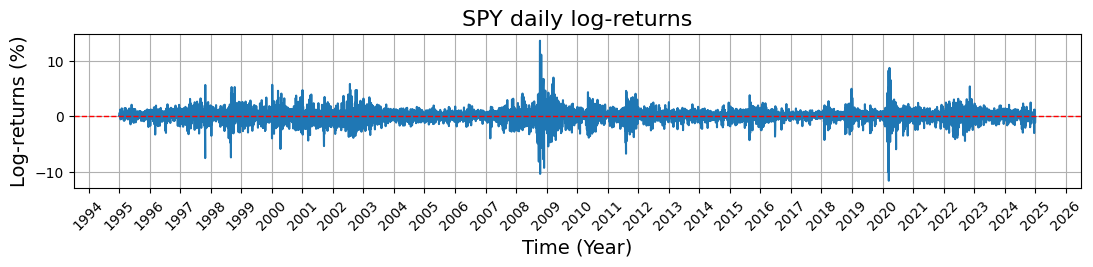

In [5]:
import matplotlib.dates as mdates

plt.figure(figsize=(13, 2))
plt.plot(r_t_clean)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('SPY daily log-returns', fontsize = 16), plt.xlabel('Time (Year)', fontsize = 14), plt.ylabel('Log-returns (%)', fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show year only
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid()

plt.show()

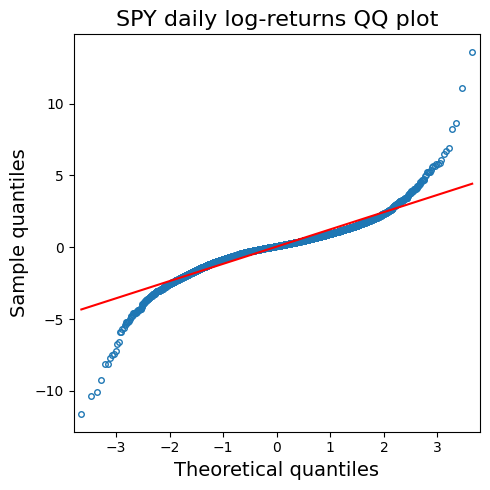

In [6]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(5, 5))
qqplot(r_t_clean, line='s', ax=ax, markersize=4, marker='o', markerfacecolor='none')

ax.set_title('SPY daily log-returns QQ plot', fontsize=16)
ax.set_xlabel('Theoretical quantiles', fontsize=14), ax.set_ylabel('Sample quantiles', fontsize=14)

plt.tight_layout()
plt.show()

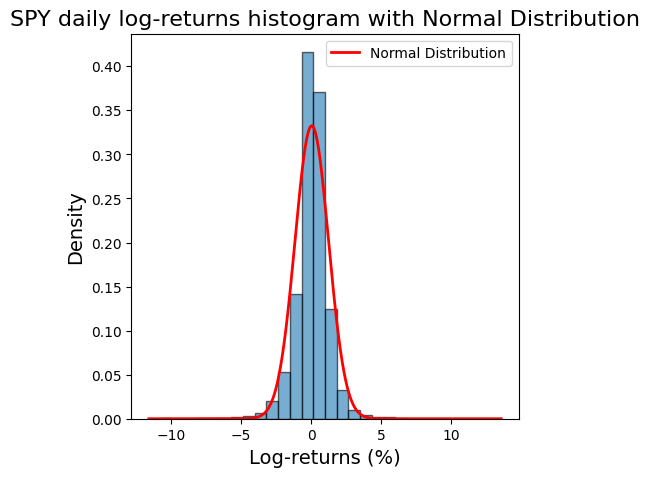

In [7]:
from scipy.stats import norm

# Assuming r_t_clean is your data
mu, std = np.mean(r_t_clean), np.std(r_t_clean)

# Create figure with size 5x5
plt.figure(figsize=(5, 5))

# Plot histogram with bars between columns
count, bins, ignored = plt.hist(r_t_clean, bins=30, density=True, edgecolor='black', alpha=0.6)

# Overlay normal distribution
x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Distribution')

# Add labels and title
plt.title('SPY daily log-returns histogram with Normal Distribution', fontsize=16)
plt.xlabel('Log-returns (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()

In [8]:
from scipy.stats import kurtosis 
print(kurtosis(r_t_clean, axis=0, bias=True, fisher = False))

13.653624416767217


## Test on BS GBM stock path 

In [9]:
from scipy.stats import norm
# Your existing GBM function
def gBm_paths(n_paths, n_points, T, mu, sigma, S_0):
    dt = T / n_points
    dB_t = np.random.normal(0, np.sqrt(dt), size=(n_paths, n_points))
    B_t = np.cumsum(dB_t, axis=1)
    B_t = np.hstack([np.zeros((n_paths, 1)), B_t])  # add starting point at 0

    t = np.linspace(0, T, n_points + 1)
    t_broadcasted = t[np.newaxis, :]

    drift = (mu - 0.5 * sigma**2) * t_broadcasted
    diffusion = sigma * B_t

    S_t = S_0 * np.exp(drift + diffusion)
    return t, S_t

In [10]:
# Input parameters for the stock prices and call options
mu = 0.01 # Drift
r = 0.01 # Drift
sigma = 0.2 # Volatility
S_0 = 100 # Initial price
K = 110 # Strike price
T = 1 # Maturity time

In [11]:
# Time and n stock price paths
t, S_paths = gBm_paths(n_paths = 1, n_points= 7552, T = T, mu = mu, sigma = sigma, S_0 = S_0) # These S_paths are later used to simulate calls

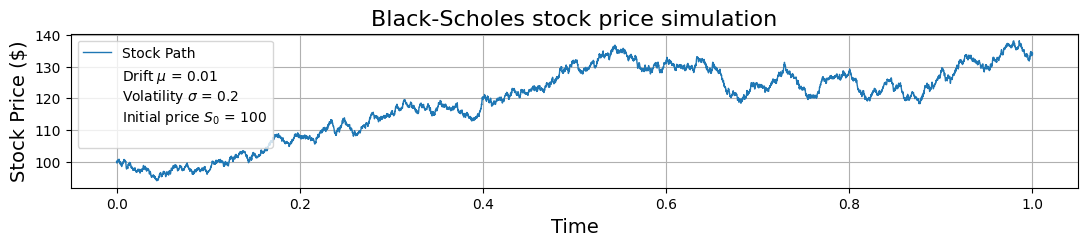

In [12]:
# plt.figure(figsize=(13, 5))
# plt.plot(t, S_paths[0].T, alpha=1)
# # plt.fill_between(t, lower_bound, upper_bound, color='orange', alpha=0.3, label='5%-95%')
# # plt.plot(t, mean_path, color='red', linewidth=1, label='Mean Path')
# plt.xlabel('Time'), plt.ylabel('Stock Price ($)'), plt.title('Black-Scholes stock price simulation')
# plt.grid(True)


# Create formatted string for the legend
params_text = (
    f"Drift $\mu$ = {mu}\n"
    f"Volatility $\sigma$ = {sigma}\n"
    f"Initial price $S_0$ = {S_0}\n"
)

# Plot
plt.figure(figsize=(13, 2))
plt.plot(t, S_paths[0].T, alpha=1, label='Stock Path', linewidth = 1)

# Add invisible plot just to insert the legend
plt.plot([], [], ' ', label=params_text)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Stock Price ($)', fontsize = 14)
plt.title('Black-Scholes stock price simulation', fontsize = 16)
plt.grid(True)
plt.legend(loc='upper left', frameon=True)

plt.show()

# plt.show()

In [13]:
# Assuming S_paths[0] is your simulated stock path
r_t2 = np.log(S_paths[0])  # Log prices
r_t2 = pd.Series(r_t2)  # Convert to pandas Series to use .diff()

# Calculate log returns (differences in log prices)
r_t_clean2 = r_t2.diff(1).dropna() * 100  # Drop the first NaN observation and multiply by 100 to get percentage returns

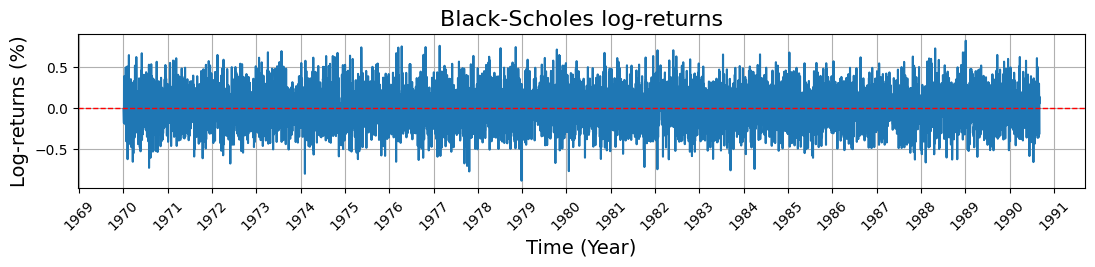

In [14]:
import matplotlib.dates as mdates

plt.figure(figsize=(13, 2))
plt.plot(r_t_clean2)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Black-Scholes log-returns', fontsize = 16), plt.xlabel('Time (Year)', fontsize = 14), plt.ylabel('Log-returns (%)', fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show year only
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid()

plt.show()

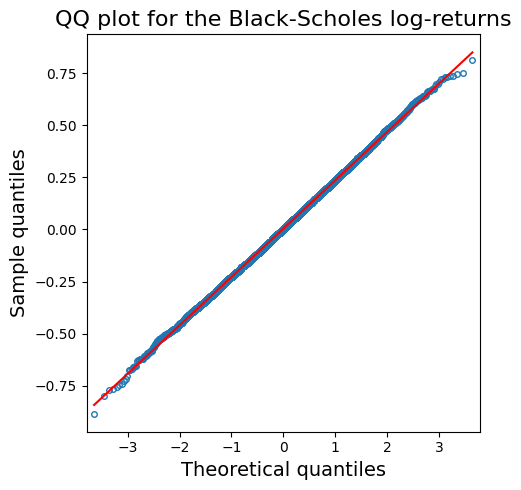

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
qqplot(r_t_clean2, line='s', ax=ax, markersize=4, marker='o', markerfacecolor='none')

ax.set_title('QQ plot for the Black-Scholes log-returns', fontsize=16)
ax.set_xlabel('Theoretical quantiles', fontsize=14), ax.set_ylabel('Sample quantiles', fontsize=14)

plt.tight_layout()
plt.show()

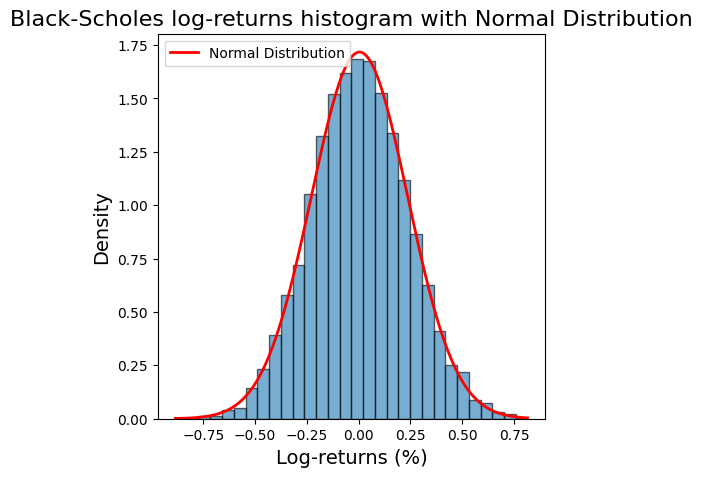

In [16]:
# Assuming r_t_clean is your data
mu, std = np.mean(r_t_clean2), np.std(r_t_clean2)

# Create figure with size 5x5
plt.figure(figsize=(5, 5))

# Plot histogram with bars between columns
count, bins, ignored = plt.hist(r_t_clean2, bins=30, density=True, edgecolor='black', alpha=0.6)

# Overlay normal distribution
x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Distribution')

# Add labels and title
plt.title('Black-Scholes log-returns histogram with Normal Distribution', fontsize=16)
plt.xlabel('Log-returns (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()

In [17]:
from scipy.stats import kurtosis 
print(kurtosis(r_t_clean2, axis=0, bias=True, fisher = False))

2.965018534870827
